In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
#gin encoder accuracy gain

##no pretrain acc
edge = 'edge15'
encoder = 'gin'
with open(f'/nasdata3/kyj/graphcl/GraphCL_Automated/transferLearning_MoleculeNet_PPI/bio/results/\
roi/only_cc/edge20/gat_none_lr1e-4_epoch300_batch400_decay0.0001_layer1_5fold_dim128_fc32_all.res','r') as file:
    x = file.readlines()
    print(x[50].split() )
    asd = float(x[50].split()[0])
    print(x[52].split() )
    com = float(x[52].split()[0])
    mean_no_pretrain = np.mean([asd, com])
    #mean_joao_res = np.mean([asd, com])

print(mean_no_pretrain)

['0.7128072558']
['0.7128072558']
0.7128072558


['0.7713968252']
['0.7713968252']
['0.8011746037999999']
['0.8011746037999999']
['0.7752517014']
['0.7752517014']
['0.7902993206']
['0.7902993206']
['0.7256643994']
['0.7256643994']
['0.8094104322']
['0.8094104322']
['0.8026122446000001']
['0.8026122446000001']
['0.7862993202000002']
['0.7862993202000002']
['0.7914149672']
['0.7914149672']
['0.7898684806']
['0.7898684806']
['0.7935873022000002']
['0.7935873022000002']
['0.7892108844000001']
['0.7892108844000001']
['0.8320816328']
['0.8320816328']
['0.7865351474']
['0.7865351474']
['0.8023945565999999']
['0.8023945565999999']
['0.7939954647999998']
['0.7939954647999998']
['0.7978911574000002']
['0.7978911574000002']
['0.7951882088000001']
['0.7951882088000001']
['0.7830476189999999']
['0.7830476189999999']
['0.7267936501999999']
['0.7267936501999999']
['0.7143764175999999']
['0.7143764175999999']
['0.7926666664000002']
['0.7926666664000002']
['0.7937369611999999']
['0.7937369611999999']
['0.7307256238']
['0.7307256238']
['0.735464853']


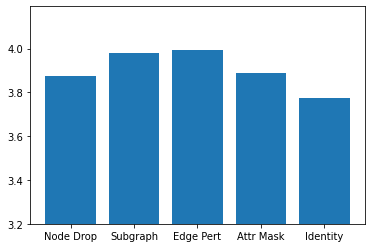

           Node Drop  Subgraph  Edge Pertb  Attr Mask  Identity
Node Drop   0.058590  0.088367    0.062444   0.077492  0.012857
Subgraph    0.096603  0.089805    0.073492   0.078608  0.077061
Edge Pert   0.080780  0.076404    0.119274   0.073728  0.089587
Attr Mask   0.081188  0.085084    0.082381   0.070240  0.013986
Identity    0.001569  0.079859    0.080930   0.017918  0.022658


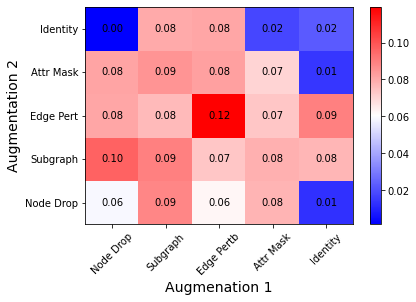

In [8]:
# pretrain acc

gcn_mean_arr = []
gat_mean_arr = []
graphsage_mean_arr = []
file_list = open(f"/nasdata3/kyj/graphcl/GraphCL_Automated/transferLearning_MoleculeNet_PPI/\
bio/results/manual/only_cc/edge20/file_list_imb",'r')
res_file_list = [i for i in file_list.read().split()]
for i in range(len(res_file_list)):
    with open(f'/nasdata3/kyj/graphcl/GraphCL_Automated/transferLearning_MoleculeNet_PPI/\
bio/results/manual/only_cc/edge20/{res_file_list[i]}all.res', 'r') as file:
        x = file.readlines()
        print(x[50].split())
        asd = float(x[50].split()[0])
        print(x[52].split())
        com = float(x[52].split()[0])
        mean = np.mean([asd, com])
        #print(asd, com, mean)
        gat_mean_arr.append(mean)
print(len(gat_mean_arr))
gat_mean_arr_np = np.reshape(gat_mean_arr,[5,5])
gat_mean_arr =  np.array(gat_mean_arr)  - np.array(mean_no_pretrain)
#gat_mean_arr =  np.array(mean_joao_res) - np.array(gat_mean_arr) 
gat_mean_arr_plt_gain =  np.reshape(gat_mean_arr,[5,5])
#gin_mean_arr = np.array(mean_no_pretrain) - np.array(gin_mean_arr) 


#-----------------------------------------
arr_sum = []
sum_axis0 = gat_mean_arr_np.sum(axis = 0)
sum_axis1 = gat_mean_arr_np.sum(axis = 1)
sum_all = np.concatenate((sum_axis0, sum_axis1), axis=0)
sum_all = np.reshape(sum_all, [2,5])
mean_all = np.mean(sum_all, axis = 0)
print("mean_all: ", mean_all)
ND = mean_all[0]
SUB = mean_all[1]
EP =mean_all[2]
AM = mean_all[3]
ID = mean_all[4]

# #sum_result = 

# print('sum_axis0: ', sum_axis0)
# print('sum_axis1: ', sum_axis1)


x = np.arange(5)
augmentations = ['Node Drop','Subgraph','Edge Pert','Attr Mask','Identity']
values = mean_all

plt.bar(x, values)
plt.ylim(3.2)
plt.xticks(x, augmentations)


plt.savefig(f'/nasdata3/kyj/graphcl/GraphCL_Automated/transferLearning_MoleculeNet_PPI/\
bio/results/manual/only_cc/edge20/gat_imb_manual_aug_result_fig_edge20.png', bbox_inches = 'tight')
plt.show()
# #-----------------------------------------

gat_mean_arr_plt = pd.DataFrame(gat_mean_arr_plt_gain, columns=['Node Drop', 'Subgraph', 'Edge Pertb', 'Attr Mask', 'Identity'],\
    index=['Node Drop', 'Subgraph', 'Edge Pert', 'Attr Mask', 'Identity'])
print(gat_mean_arr_plt)

plt.pcolor(gat_mean_arr_plt)

plt.set_cmap('bwr')

plt.xticks(np.arange(0.5, len(gat_mean_arr_plt.columns), 1), gat_mean_arr_plt.columns,rotation=45)

plt.yticks(np.arange(0.5, len(gat_mean_arr_plt.index), 1), gat_mean_arr_plt.index)

#plt.title(f'Automatic augmentation sampling accuracy gain', fontsize=20)

plt.xlabel('Augmenation 1', fontsize=14)

plt.ylabel('Augmentation 2', fontsize=14)


for y in range(5):
   for x in range(5):
      plt.text(x + 0.5, y + 0.5, '%.2f' % gat_mean_arr_plt_gain[y, x],
         horizontalalignment='center',
         verticalalignment='center',
      )

plt.colorbar()
#plt.clim(-0.05, 0.15)
plt.savefig(f'/nasdata3/kyj/graphcl/GraphCL_Automated/transferLearning_MoleculeNet_PPI/\
bio/results/manual/only_cc/edge20/graphcl_accuracy_gain_with_nopre_imb.png', bbox_inches = 'tight')

In [35]:
#gcn encoder accuracy gain

##no pretrain acc
edge = 'edge15'
encoder = 'gcn'
with open(f'../../roi/aug3/{edge}/{encoder}_0.001_lr1e-4_evaltrain1_split311_epoch300_batch100_s_decay0.01.res','r') as file:
    x = file.readlines()
    asd = float(x[10].split()[1])
    com = float(x[12].split()[1])
    mean_no_pretrain = np.mean([asd, com])

##pretrain acc
gcn_mean_arr=[]
gin_mean_arr = []
graphsage_mean_arr = []
file_list = open(f"./{edge}/{encoder}_file_list",'r')
res_file_list = [i for i in file_list.read().split()]
for i in range(len(res_file_list)):
    with open(f'./{edge}/{res_file_list[i]}', 'r') as file:
        x = file.readlines()
        asd = float(x[10].split()[1])
        com = float(x[12].split()[1])
        mean = np.mean([asd, com])
        #print(asd, com, mean)
        gcn_mean_arr.append(mean)
print(gcn_mean_arr)
gcn_mean_arr = np.array(gcn_mean_arr) - np.array(mean_no_pretrain)
#gcn_mean_arr = np.array(mean_no_pretrain) - np.array(gcn_mean_arr)
gcn_mean_arr_np = np.reshape(gcn_mean_arr,[5,5])


#-----------------------------------------
arr_sum = []
sum_axis0 = gcn_mean_arr_np.sum(axis = 0)
sum_axis1 = gcn_mean_arr_np.sum(axis = 1)
sum_all = np.concatenate((sum_axis0, sum_axis1), axis=0)
sum_all = np.reshape(sum_all, [2,5])
mean_all = np.mean(sum_all, axis = 0)
print("mean_all", mean_all)
ND = mean_all[0]
SUB = mean_all[1]
EP =mean_all[2]
AM = mean_all[3]
ID = mean_all[4]

print('sum_axis0: ', sum_axis0)
print('sum_axis1: ', sum_axis1)

x = np.arange(5)
augmentations = ['Node Drop','Subgraph','Edge Pert','Attr Mask','Identity']
values = mean_all

plt.bar(x, values)
plt.xticks(x, augmentations)

plt.show()

#-----------------------------------------

gcn_mean_arr = pd.DataFrame(gcn_mean_arr_np, columns=['Node Drop', 'Subgraph', 'Edge Pertb', 'Attr Mask', 'Identity'],\
    index=['Node Drop', 'Subgraph', 'Edge Pert', 'Attr Mask', 'Identity'])
print(gcn_mean_arr)

plt.pcolor(gcn_mean_arr)

plt.set_cmap('bwr')

plt.xticks(np.arange(0.5, len(gcn_mean_arr.columns), 1), gcn_mean_arr.columns,rotation=45)

plt.yticks(np.arange(0.5, len(gcn_mean_arr.index), 1), gcn_mean_arr.index)

plt.title(f'GCN & HCP & partial corr_{(edge)} + ROIonehot', fontsize=20)

plt.xlabel('Augmenation 1', fontsize=14)

plt.ylabel('Augmentation 2', fontsize=14)


for y in range(5):
   for x in range(5):
      plt.text(x + 0.5, y + 0.5, '%.2f' % gcn_mean_arr_np[y, x],
         horizontalalignment='center',
         verticalalignment='center',
      )

plt.colorbar()
plt.clim(-0.3, 0.3)
plt.savefig(f'./{encoder}_manual_fig_{edge}_aug3joaoGain_with_gcl.png', bbox_inches = 'tight')

FileNotFoundError: [Errno 2] No such file or directory: '../../roi/aug3/edge15/gcn_0.001_lr1e-4_evaltrain1_split311_epoch300_batch100_s_decay0.01.res'

[0.7833333335, 0.8600000000000001, 0.857777778, 0.762777778, 0.7488888899999999, 0.8400000009999999, 0.8288888875, 0.9283333345000001, 0.813888889, 0.8594444435, 0.9027777785000001, 0.530000001, 0.8094444455, 0.8894444445, 0.821111113, 0.7511111109999999, 0.8116666655, 0.821111111, 0.782222223, 0.7927777785000001, 0.8222222225, 0.897777778, 0.7883333335, 0.8766666670000001, 0.761666666]
mean_all [-0.63555556 -0.59222223 -0.61277778 -0.64972223 -0.62638889]
sum_axis0:  [-0.59222223 -0.76333334 -0.48666667 -0.56666667 -0.70777778]
sum_axis1:  [-0.67888889 -0.42111112 -0.73888889 -0.73277778 -0.54500001]


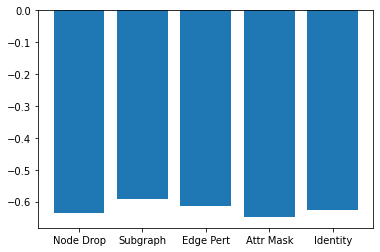

           Node Drop  Subgraph  Edge Pertb  Attr Mask  Identity
Node Drop  -0.155000 -0.078333   -0.080556  -0.175556 -0.189444
Subgraph   -0.098333 -0.109444   -0.010000  -0.124444 -0.078889
Edge Pert  -0.035556 -0.408333   -0.128889  -0.048889 -0.117222
Attr Mask  -0.187222 -0.126667   -0.117222  -0.156111 -0.145556
Identity   -0.116111 -0.040556   -0.150000  -0.061667 -0.176667


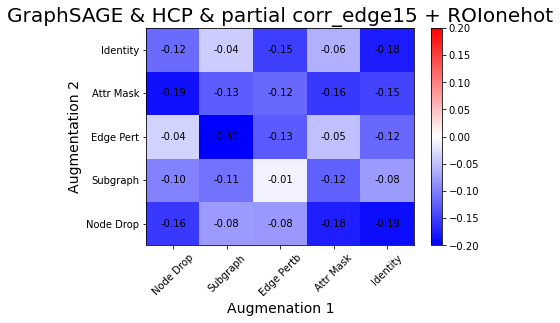

In [69]:
#graphsage encoder accuracy gain

##no pretrain acc
edge = 'edge15'
encoder = 'graphsage'
with open(f'../../roi/aug3/{edge}/{encoder}_0.01_lr1e-4_evaltrain1_split311_epoch300_batch100_s_decay0.01.res','r') as file:
    x = file.readlines()
    asd = float(x[10].split()[1])
    com = float(x[12].split()[1])
    mean_no_pretrain = np.mean([asd, com])
    
##pretrain acc

gcn_mean_arr = []
gin_mean_arr = []
graphsage_mean_arr = []
file_list = open(f"./{edge}/graphsage_file_list",'r')
res_file_list = [i for i in file_list.read().split()]
for i in range(len(res_file_list)):
    with open(f'./{edge}/{res_file_list[i]}', 'r') as file:
        x = file.readlines()
        asd = float(x[10].split()[1])
        com = float(x[12].split()[1])
        mean = np.mean([asd, com])
        #print(asd, com, mean)
        graphsage_mean_arr.append(mean)
print(graphsage_mean_arr)
graphsage_mean_arr = np.array(graphsage_mean_arr) - np.array(mean_no_pretrain)
#graphsage_mean_arr = np.array(mean_no_pretrain) - np.array(graphsage_mean_arr) 
graphsage_mean_arr_np = np.reshape(graphsage_mean_arr,[5,5])

#-----------------------------------------
arr_sum = []
sum_axis0 = graphsage_mean_arr_np.sum(axis = 0)
sum_axis1 = graphsage_mean_arr_np.sum(axis = 1)
sum_all = np.concatenate((sum_axis0, sum_axis1), axis=0)
sum_all = np.reshape(sum_all, [2,5])
mean_all = np.mean(sum_all, axis = 0)
print('mean_all', mean_all)
ND = mean_all[0]
SUB = mean_all[1]
EP =mean_all[2]
AM = mean_all[3]
ID = mean_all[4]

print('sum_axis0: ', sum_axis0)
print('sum_axis1: ', sum_axis1)

x = np.arange(5)
augmentations = ['Node Drop','Subgraph','Edge Pert','Attr Mask','Identity']
values = mean_all

plt.bar(x, values)
plt.xticks(x, augmentations)

plt.show()

#-----------------------------------------

graphsage_mean_arr = pd.DataFrame(graphsage_mean_arr_np, columns=['Node Drop', 'Subgraph', 'Edge Pertb', 'Attr Mask', 'Identity'],\
    index=['Node Drop', 'Subgraph', 'Edge Pert', 'Attr Mask', 'Identity'])
print(graphsage_mean_arr)

plt.pcolor(graphsage_mean_arr)

plt.set_cmap('bwr')

plt.xticks(np.arange(0.5, len(graphsage_mean_arr.columns), 1), graphsage_mean_arr.columns,rotation=45)

plt.yticks(np.arange(0.5, len(graphsage_mean_arr.index), 1), graphsage_mean_arr.index)

plt.title(f'GraphSAGE & HCP & partial corr_{(edge)} + ROIonehot', fontsize=20)

plt.xlabel('Augmenation 1', fontsize=14)

plt.ylabel('Augmentation 2', fontsize=14)


for y in range(5):
   for x in range(5):
      plt.text(x + 0.5, y + 0.5, '%.2f' % graphsage_mean_arr_np[y, x],
         horizontalalignment='center',
         verticalalignment='center',
      )

plt.colorbar()
plt.clim(-0.2, 0.2)
plt.savefig(f'./{encoder}_manual_fig_{edge}_aug3joaoGain_with_gcl.png', bbox_inches = 'tight')

TypeError: object of type 'numpy.float64' has no len()

In [7]:
mean_arr = []
sd_arr = []

res_file= open('../../roi/aug2/res_file', 'r')
res_file_list = [i for i in res_file.read().split()]
res_file_list_np = np.array(res_file_list)
res_file_list_np = np.reshape(res_file_list_np, (1,12))

for i in range(len(res_file_list)):
    with open(f'../../roi/aug2/{res_file_list[i]}', 'r') as file:
        x = file.readlines()
        asd_mean = float(x[10].split()[1])
        com_mean = float(x[12].split()[1])
        asd_sd = float(x[11].split()[1])
        com_sd = float(x[13].split()[1])
        mean = np.mean([asd_mean, com_mean])
        sd = np.mean([asd_sd, com_sd])
        #print(asd, com, mean)
        mean_arr.append(mean)
        sd_arr.append(sd)
#print(mean_arr)
#print(sd_arr)
mean_arr = np.reshape(np.array(mean_arr), (1,12))
sd_arr = np.reshape(np.array(sd_arr), (1,12))
total = np.concatenate((res_file_list_np, mean_arr), axis=0)
total = np.concatenate((total, sd_arr), axis=0)
print(total.shape)
np.savetxt('./aug2_result.csv',total,delimiter=",", fmt="%s")

(3, 12)


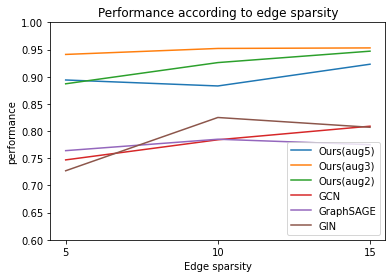

In [20]:
plt.plot(['5','10','15'], [0.894, 0.883, 0.923], label='Ours(aug5)')  #aug5
plt.plot(['5','10','15'], [0.941, 0.952, 0.953], label='Ours(aug3)')  #aug3
plt.plot(['5','10','15'], [0.887, 0.926, 0.947], label='Ours(aug2)')  #aug2
plt.plot(['5','10','15'], [0.747, 0.784, 0.809], label='GCN')  #GCN
plt.plot(['5','10','15'], [0.764, 0.785, 0.775], label='GraphSAGE')  #graphsage
plt.plot(['5','10','15'], [0.727, 0.825, 0.807], label='GIN')  #gin
plt.ylim([0.4, 1])
plt.xlabel('Edge sparsity'), plt.ylabel('performance')
plt.title("Performance according to edge sparsity")
plt.legend()
plt.show
plt.savefig('./Performance_according_to_edge_sparsity.png', bbox_inches = 'tight')

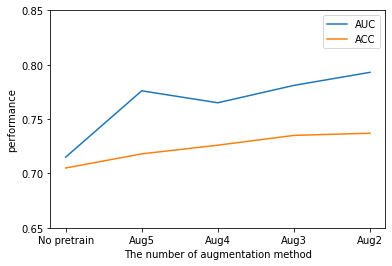

In [12]:
plt.plot(['No pretrain','Aug5','Aug4','Aug3', 'Aug2'], [0.715, 0.776, 0.765, 0.781, 0.793], label='AUC')
plt.plot(['No pretrain','Aug5','Aug4','Aug3', 'Aug2'], [0.705, 0.718, 0.726, 0.735, 0.737], label='ACC')   

plt.yticks(np.arange(0.65,0.86,0.05))
plt.ylim([0.65, 0.85])
plt.xlabel('The number of augmentation method'), plt.ylabel('performance')
plt.legend()
plt.show
plt.savefig('./Performance_according_to_num_of_aug_imb.png', bbox_inches = 'tight')